<a href="https://colab.research.google.com/github/adalau05/data-analysis/blob/main/Retail_Products_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective: To classify retail products into four categories using rules:**

⭐ **Stars** – High sales, high margin, high traffic

🚦 **Traffic Builders** – High traffic/units sold, low margin

💎 **Hidden Gems** – Low traffic, high margin, strong profitability

🪦 **Dead Stock** – Low sales, low margin, low movement



# **Actionable Insights by Product Classification**

⭐ **Stars**

**High sales + high margin = core profit and growth drivers**


🔍 **What this signals**

Customers love these products.

They are efficient revenue and margin contributors.

They turn inventory quickly.


✅ **Recommended Actions**

**Increase stock levels** to avoid sellouts and lost revenue.

**Prioritize in marketing campaigns** (newsletter top spots, homepage placements).

**Expand variants** (new colors, sizes, bundles) to extend winning lines.

**Use Stars as anchor items** in promotions to drive cross-sells.

**Monitor competitor pricing** to maintain leadership without margin erosion.

---

🚦 **Traffic Builders**

**High sales + low margin = strong traffic but weak profitability**

🔍 **What this signals**

These products bring customers in.

They may be price-sensitive or competitively positioned.

✅ **Recommended Actions**

**Consider slight price increases** if demand is inelastic.

**Optimize cost of goods** (supplier renegotiation, packaging adjustments).

**Bundle with higher**-margin products to lift overall profitability.

**Place strategically in-store or online** to maximize conversion flow (e.g., category landing pages).

**Limit excessive discounting**—these already sell well.

---

💎 **Hidden Gems**

**Low sales + high margin = high potential products underexposed**

🔍 **What this signals**

Great profitability but low customer awareness.

Possible opportunity being missed.

✅ **Recommended Actions**

**Increase visibility** (recommendations, featured placements, staff picks).

**Test promotional nudges** (e.g., small discounts or bundles) to increase volume.

**Improve product descriptions or visual assets** to boost appeal.

**Check placement within store navigation**—may be buried too deep.

**Investigate customer segments** who buy them and target similar audiences.

---

🪦 **Dead Stock**

**Low sales + low margin + slow turnover = inventory risk**

🔍 **What this signals**

Inventory is tying up cash.

Customer demand is weak or nonexistent.

Risk of obsolescence or markdown necessity.

✅ **Recommended Actions**

Aggressive markdowns to clear stock and free working capital.

**Identify root causes:**

Poor product-market fit

Wrong sizes/colors

Low visibility

Pricing mismatch

**Avoid reorders** until drivers of low performance are understood.

**Use in clearance events or bundles** to recover some value.

**Feed into demand forecasting** as negative indicators.


# **✔ Portfolio-Level Insights (Cross-Category)**

📌 1. **Balance your product mix**

A healthy assortment has:
*   ~10–20% **Stars**
*   ~20–30% **Traffic Builders**
*   ~10–15% **Hidden Gems**
*   <10% **Dead Stock**

A high % of Dead Stock signals planning or demand forecasting issues.

---

📌 2. **Identify category gaps**

If some categories have many Traffic Builders but few Stars, consider:
*   Innovation
*   Design updates
*   Product research

If Hidden Gems cluster around specific categories, consider:
*   Investing in marketing for those categories.

---

📌 3. **Strengthen pricing strategy**

*   **Stars:** Maintain or carefully test upward pricing.
*   **Traffic Builders:** Watch margins and avoid unnecessary promotions.
*  **Hidden Gems:** Explore visibility before changing price.
*   **Dead Stock**: Mark down early to minimize losses.
---

📌 4. **Guide inventory decisions**

*   **Stars** → Increase buy depth
*   **Traffic Builders** → Maintain steady flow
*   **Hidden Gems** → Controlled restocks tied to demand tests
*   **Dead Stock** → Reduce or eliminate future buys

# **How? These are made-up rules corresponding to the labels above:**

⭐ **Stars**

Units Sold high > 1500

Margin % high > 20%

🚦 **Traffic Builders**

Units Sold high (> 1500)

Margin % low (< 20%)

💎 **Hidden Gems**

Units Sold low (< 1000)

Margin % high (> 30%)

🪦 **Dead Stock**

Units Sold low (< 300)

Margin % low (< 15%)

or Long inventory days (> 70)

**other**

unclassified

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/products.csv')
display(df.head())

,Product_ID,Product_Name,Category,Units_Sold,Margin_%,Inventory_Days,Price
0,1,Echo Edge,Apparel,5694,42,54,243
1,2,Flare Core,Fitness,2572,51,47,233
2,3,Flare Core,Footwear,1425,37,138,200
3,4,Echo Boost,Gear,5384,57,10,159
4,5,Drift Flex,Apparel,5538,24,113,285


In [ ]:
#set conditions for classification

conditions = [
    (df['Units_Sold'] >= 1500) & (df['Margin_%'] >= 20),
    (df['Units_Sold'] >= 1500) & (df['Margin_%'] < 20),
    (df['Units_Sold'] < 1500)  & (df['Margin_%'] >= 30),
    ((df['Units_Sold'] < 300) & (df['Margin_%'] < 15)) | (df['Inventory_Days'] > 70)
]

choices = [
    "Star",
    "Traffic Builder",
    "Hidden Gem",
    "Dead Stock"
]

df['Classification'] = np.select(conditions, choices, default="Other")

In [ ]:
#display the final file with classification
display(df.head())

,Product_ID,Product_Name,Category,Units_Sold,Margin_%,Inventory_Days,Price,Classification
0,1,Echo Edge,Apparel,5694,42,54,243,Star
1,2,Flare Core,Fitness,2572,51,47,233,Star
2,3,Flare Core,Footwear,1425,37,138,200,Hidden Gem
3,4,Echo Boost,Gear,5384,57,10,159,Star
4,5,Drift Flex,Apparel,5538,24,113,285,Star


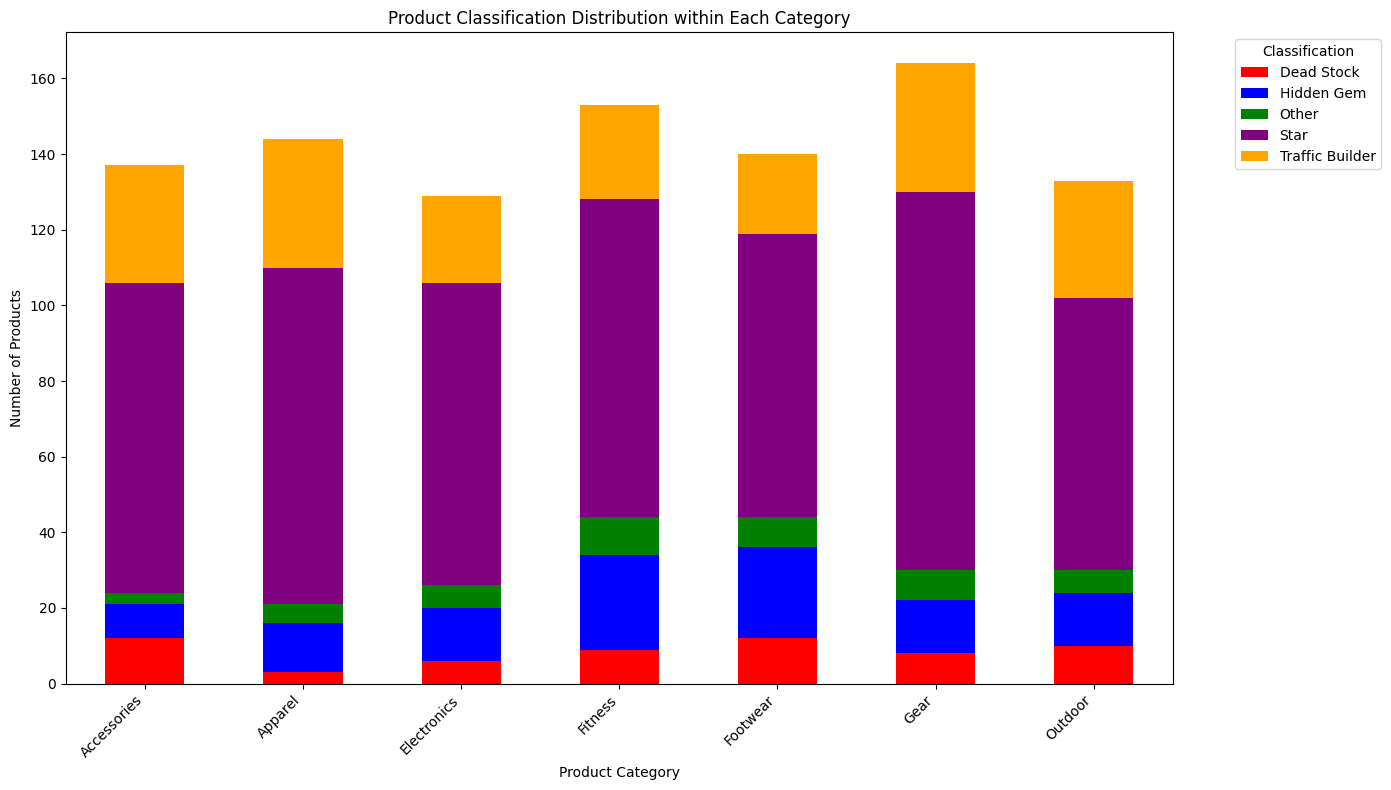

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming category_classification_counts is already defined and available
# Reset index to make 'Category' a column
plot_df = category_classification_counts.reset_index()

# Define the custom colors based on the order of classifications in the DataFrame columns
# The default column order after unstacking/resetting index is typically alphabetical
# Let's verify the order and assign colors accordingly
# Current DataFrame columns for classification are: ['Dead Stock', 'Hidden Gem', 'Other', 'Star', 'Traffic Builder']
custom_colors = ['red', 'blue', 'green', 'purple', 'orange']

# Set 'Category' as index for stacking, then plot
plot_df.set_index('Category').plot(kind='bar', stacked=True, figsize=(14, 8), color=custom_colors)

plt.title('Product Classification Distribution within Each Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Based on the analysis, here's what we can tell about your product classification distribution:**

**Overall Product Classification Summary**

**Stars:** You currently have a very high proportion of Stars (58.20% of products), which is significantly above the ideal range of 10–20%. This suggests a **strong core of high-performing products.**

**Traffic Builders:** Your Traffic Builders account for 19.90% of products, which is within the ideal range of 20–30%. These products are effectively bringing in customers.

**Hidden Gems:** Hidden Gems make up 11.30% of your portfolio, falling within the ideal range of 10–15%. These are products with high potential that might need more visibility.

**Dead Stock:** Your Dead Stock is at 6.00%, which is well within the acceptable ideal of less than 10%. This indicates **relatively low inventory risk from poorly performing items.**

**Other:** A small portion (4.60%) falls into 'Other', meaning they didn't strictly fit into the defined rules for the main categories.

# **Key Takeaways:**

The portfolio is **heavily weighted towards Stars**, which is **generally positive** as these are your highest profit and growth drivers. However, such a high percentage might indicate that some products currently classified as Stars could potentially be pushed into even higher performance, or perhaps the criteria for 'Stars' are broad. It also suggests that there might be **opportunities to cultivate more 'Traffic Builders' or 'Hidden Gems' if the goal is a more diversified portfolio balance.**

# Compare results with the Ideal Portfolio Mix

In [ ]:
classification_counts = df['Classification'].value_counts()
total_products = len(df)

star_count = classification_counts.get('Star', 0)
traffic_builder_count = classification_counts.get('Traffic Builder', 0)
hidden_gem_count = classification_counts.get('Hidden Gem', 0)
dead_stock_count = classification_counts.get('Dead Stock', 0)
other_count = classification_counts.get('Other', 0)

star_percentage = (star_count / total_products) * 100
traffic_builder_percentage = (traffic_builder_count / total_products) * 100
hidden_gem_percentage = (hidden_gem_count / total_products) * 100
dead_stock_percentage = (dead_stock_count / total_products) * 100
other_percentage = (other_count / total_products) * 100

summary_markdown = f"""
### **Product Classification Summary**

Based on the defined rules, here's the current distribution of your products across the categories:

*   **Stars**: High sales, high margin, high traffic (currently {star_count} products, or {star_percentage:.2f}%)
*   **Traffic Builders**: High traffic/units sold, low margin (currently {traffic_builder_count} products, or {traffic_builder_percentage:.2f}%)
*   **Hidden Gems**: Low traffic, high margin, strong profitability (currently {hidden_gem_count} products, or {hidden_gem_percentage:.2f}%)
*   **Dead Stock**: Low sales, low margin, low movement (currently {dead_stock_count} products, or {dead_stock_percentage:.2f}%)
*   **Other**: Products that do not fit into the above categories (currently {other_count} products, or {other_percentage:.2f}%)

---

**Ideal Portfolio Mix (for comparison):**

*   ~10–20% **Stars**
*   ~20–30% **Traffic Builders**
*   ~10–15% **Hidden Gems**
*   <10% **Dead Stock**

This summary provides a quick overview of your product portfolio's health, allowing you to identify areas that might need attention based on the recommended actions for each category outlined earlier.
"""

from IPython.display import Markdown
display(Markdown(summary_markdown))


### **Product Classification Summary**

Based on the defined rules, here's the current distribution of your products across the categories:

*   **Stars**: High sales, high margin, high traffic (currently 582 products, or 58.20%)
*   **Traffic Builders**: High traffic/units sold, low margin (currently 199 products, or 19.90%)
*   **Hidden Gems**: Low traffic, high margin, strong profitability (currently 113 products, or 11.30%)
*   **Dead Stock**: Low sales, low margin, low movement (currently 60 products, or 6.00%)
*   **Other**: Products that do not fit into the above categories (currently 46 products, or 4.60%)

---

**Ideal Portfolio Mix (for comparison):**

*   ~10–20% **Stars**
*   ~20–30% **Traffic Builders**
*   ~10–15% **Hidden Gems**
*   <10% **Dead Stock**

This summary provides a quick overview of your product portfolio's health, allowing you to identify areas that might need attention based on the recommended actions for each category outlined earlier.


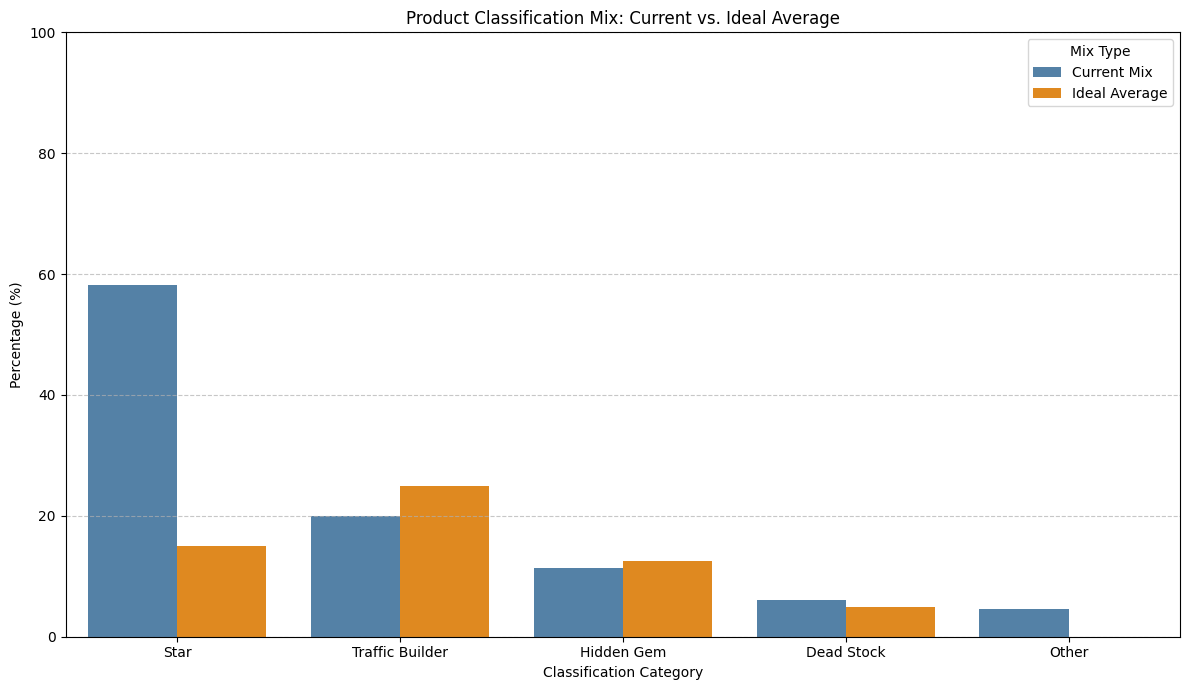

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Current percentages (from previous execution, assuming these variables are still in scope)
current_mix = {
    'Star': star_percentage,
    'Traffic Builder': traffic_builder_percentage,
    'Hidden Gem': hidden_gem_percentage,
    'Dead Stock': dead_stock_percentage,
    'Other': other_percentage
}

# Ideal portfolio mix ranges
ideal_mix_min = {
    'Star': 10,
    'Traffic Builder': 20,
    'Hidden Gem': 10,
    'Dead Stock': 0,
    'Other': 0 # Assuming 'Other' should ideally be 0%
}

ideal_mix_max = {
    'Star': 20,
    'Traffic Builder': 30,
    'Hidden Gem': 15,
    'Dead Stock': 10,
    'Other': 0 # Assuming 'Other' should ideally be 0%
}

# Calculate Ideal Average Mix
ideal_mix_avg = {}
for category in ideal_mix_min:
    if ideal_mix_min[category] == 0 and ideal_mix_max[category] == 0:
        ideal_mix_avg[category] = 0
    else:
        ideal_mix_avg[category] = (ideal_mix_min[category] + ideal_mix_max[category]) / 2

# Prepare data for plotting
data = []
for category in current_mix:
    data.append({
        'Category': category,
        'Type': 'Current Mix',
        'Percentage': current_mix[category]
    })
    data.append({
        'Category': category,
        'Type': 'Ideal Average',
        'Percentage': ideal_mix_avg[category]
    })

plot_df = pd.DataFrame(data)

# Create the plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Category', y='Percentage', hue='Type', data=plot_df, palette={'Current Mix': 'steelblue', 'Ideal Average': 'darkorange'})

plt.title('Product Classification Mix: Current vs. Ideal Average')
plt.ylabel('Percentage (%)')
plt.xlabel('Classification Category')
plt.ylim(0, 100) # Set y-axis limit to 100%
plt.legend(title='Mix Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **What can you tell about the Current vs Ideal Average mix plot**

The 'Current vs. Ideal Average Mix' plot visually compares the product portfolio's current distribution across classifications to an ideal average distribution.

**Here’s what it highlights:**

**Stars:** The current proportion of 'Stars' (58.20%) is **significantly higher than the ideal average** (15%). This indicates a very strong core of high-performing products, which is great for profit, but it's also a substantial deviation from the suggested balance. It could mean the criteria for 'Stars' are broad, or there's an opportunity to shift focus to other categories to diversify.

**Traffic Builders:** The 'Traffic Builders' are at 19.90%, which is **slightly below the ideal average** of 25%. This suggests you have a good base of products attracting customers, but there's **room to grow this segment to meet the ideal target.**

**Hidden Gems:** The 'Hidden Gems' are at 11.30%, which is very close to the ideal average of 12.5%. This means you have a **healthy number of high-potential, high-margin products** that might just need **increased visibility** to become more prominent.

**Dead Stock:** The 'Dead Stock' is at 6.00%, which is **slightly above the ideal average of** 5% but still well within the acceptable range (below 10%). This indicates **good inventory management and relatively low risk** from underperforming items.

**Other:** The 'Other' category accounts for 4.60% of products, while the ideal average is 0%. This highlights products that don't neatly fit into the main classifications and might warrant **individual review or refinement of the classification rules**.

In summary, the plot clearly shows that your portfolio is **heavily skewed towards 'Stars' compared to the ideal average**. While 'Traffic Builders' and 'Hidden Gems' are somewhat aligned or slightly under, the 'Other' category indicates some products don't fit the current rules. This visual comparison can guide **strategic adjustments to achieve a more balanced and potentially more resilient product mix.**